# Research Topic: Predicting Early Sexual Debut in Rwanda Using Machine Learning to Understand Early Pregnancy Risk

## **Phase 1: Data Understanding and Preparation**

### Step 1: Import Libraries

In [ ]:

import pandas as pd
import pyreadstat


In [6]:
!pip install pyreadstat


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### Step 2: Define File Paths

In [2]:
import pyreadstat

path_ir = r"C:/Users/USER/Desktop/MUKABUGINGO_THESIS_CODES/RWIR81FL.DTA"
path_br = r"C:/Users/USER/Desktop/MUKABUGINGO_THESIS_CODES/RWBR81FL.DTA"
path_hr = r"C:/Users/USER/Desktop/MUKABUGINGO_THESIS_CODES/RWHR81FL.DTA"


###  Step 3: Load the Datasets

In [ ]:

# === Load DHS datasets ===
df_ir, meta_ir = pyreadstat.read_dta(path_ir)
df_br, meta_br = pyreadstat.read_dta(path_br)
df_hr, meta_hr = pyreadstat.read_dta(path_hr)

# === Optional print to confirm ===
print("IR file shape:", df_ir.shape)
print("BR file shape:", df_br.shape)
print("HR file shape:", df_hr.shape)


IR file shape: (14634, 5117)
BR file shape: (30820, 1216)
HR file shape: (12949, 3485)


# IR dataset analysis

### Step 1: Select Relevant Columns (from IR dataset)

In [11]:
# Relevant columns from IR
relevant_columns_ir = [
     'caseid', 'v001', 'v002', 'v525', 'v012', 'v106', 'v190', 'v025', 
    'v501', 'v511', 'v024', 'v102', 'v130', 'v218', 'v467b', 'v605',
    'v743a', 'v743b', 'v743d', 'v743f', 'v159', 'v160', 'v161', 'v744a',
    'v744b', 'v744c', 'v744d'
]

# Filter only available columns
relevant_columns_ir = [col for col in relevant_columns_ir if col in df_ir.columns]

# Select them
df_ir = df_ir[relevant_columns_ir]


In [12]:
# Early sexual debut = True if <18
df_ir['early_sexual_debut'] = df_ir['v525'] < 18


In [13]:
df_ir.shape

(14634, 28)

✓ Dataset loaded successfully
RWANDA DHS DATASET - DATA QUALITY ASSESSMENT

1. DATASET DIMENSIONS VERIFICATION
----------------------------------------
Actual dimensions: 14,634 rows × 44 columns
Documentation claim: 14,634 rows × 44 columns
✓ Row count matches documentation
✓ Column count matches documentation

2. TARGET VARIABLE VALIDATION
----------------------------------------
Target Variable Distribution:
  0.0: 7,919 cases (54.1%)
  1.0: 6,715 cases (45.9%)

Valid Cases Only (excluding NaN):
  Early debut (1.0): 45.9% of valid cases
  Late debut (0.0): 54.1% of valid cases

3. LITERATURE COMPARISON
----------------------------------------
Observed early debut rate: 45.9%
Documentation claim: 27.1%
Problem statement claim: 45.9%
⚠️  Deviates from documentation by 18.8 percentage points

4. DATA LEAKAGE ASSESSMENT
----------------------------------------
Leakage variables present: ['v525', 'v512', 'v511', 'v212']
Leakage variables missing: []
✓ Confirmed: early_sexual_debut perfec

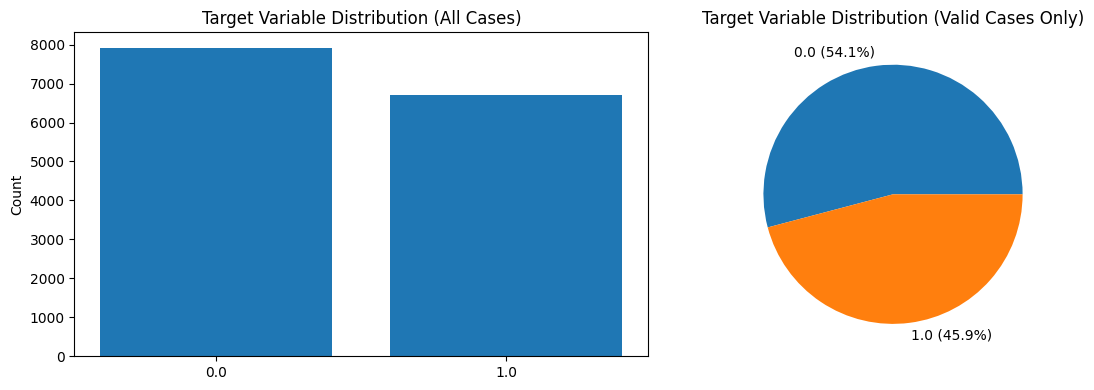

###  Merge IR with BR Dataset (Births)

In [16]:
# Merge IR and BR using woman ID: caseid
df_merged_1 = df_ir.merge(df_br, on='caseid', how='left', suffixes=('_ir', '_br'))


In [18]:
df_merged_1.shape

(36240, 1243)

In [19]:
df_merged_1.columns

Index(['caseid', 'v001_ir', 'v002_ir', 'v525_ir', 'v012_ir', 'v106_ir',
       'v190_ir', 'v025_ir', 'v501_ir', 'v511_ir',
       ...
       's412b', 's412d', 's412f', 's413d', 's413e', 's457f', 's470b', 'idx95',
       's525an', 's610b'],
      dtype='object', length=1243)

### Merge with Household Recode

In [ ]:
# Keep only relevant variables from all sources
selected_columns = [
    'v525', 'v012', 'v106', 'v190', 'v025', 'v511', 'v130', 'v218',  # from IR
    'b3', 'bidx',  # from BR (birth date of children)
    'hv201', 'hv205', 'hv206', 'hv209'  # from HR (e.g., water, toilet, electricity)
]

# Filter columns (keep only if they exist)
selected_columns = [col for col in selected_columns if col in df_final.columns]

df_model = df_final[selected_columns]

# Drop rows with missing values in target variable
df_model = df_model[df_model['v525'].notna()]


In [ ]:
print("IR columns:", df_ir.columns.tolist())
print("BR columns:", df_br.columns.tolist())
print("HR columns:", df_hr.columns.tolist())


IR columns: ['caseid', 'v001', 'v002', 'v525', 'v012', 'v106', 'v190', 'v025', 'v501', 'v511', 'v024', 'v102', 'v130', 'v218', 'v467b', 'v605', 'v743a', 'v743b', 'v743d', 'v743f', 'v159', 'v160', 'v161', 'v744a', 'v744b', 'v744c', 'v744d', 'early_sexual_debut']
BR columns: ['caseid', 'bidx', 'v000', 'v001', 'v002', 'v003', 'v004', 'v005', 'v006', 'v007', 'v008', 'v008a', 'v009', 'v010', 'v011', 'v012', 'v013', 'v014', 'v015', 'v016', 'v017', 'v018', 'v019', 'v019a', 'v020', 'v021', 'v022', 'v023', 'v024', 'v025', 'v026', 'v027', 'v028', 'v029', 'v030', 'v031', 'v032', 'v034', 'v040', 'v042', 'v044', 'v045a', 'v045b', 'v045c', 'v046', 'v101', 'v102', 'v103', 'v104', 'v105', 'v105a', 'v106', 'v107', 'v113', 'v115', 'v116', 'v119', 'v120', 'v121', 'v122', 'v123', 'v124', 'v125', 'v127', 'v128', 'v129', 'v130', 'v131', 'v133', 'v134', 'v135', 'v136', 'v137', 'v138', 'v139', 'v140', 'v141', 'v149', 'v150', 'v151', 'v152', 'v153', 'awfactt', 'awfactu', 'awfactr', 'awfacte', 'awfactw', 'v155'

In [28]:
print("df_merged_1:",df_merged_1.columns.tolist())
print("HR columns:", df_hr.columns.tolist())

df_merged_1: ['caseid', 'v001_ir', 'v002_ir', 'v525_ir', 'v012_ir', 'v106_ir', 'v190_ir', 'v025_ir', 'v501_ir', 'v511_ir', 'v024_ir', 'v102_ir', 'v130_ir', 'v218_ir', 'v467b_ir', 'v605_ir', 'v743a_ir', 'v743b_ir', 'v743d_ir', 'v743f_ir', 'v159_ir', 'v160_ir', 'v161_ir', 'v744a_ir', 'v744b_ir', 'v744c_ir', 'v744d_ir', 'early_sexual_debut', 'bidx', 'v000', 'v001_br', 'v002_br', 'v003', 'v004', 'v005', 'v006', 'v007', 'v008', 'v008a', 'v009', 'v010', 'v011', 'v012_br', 'v013', 'v014', 'v015', 'v016', 'v017', 'v018', 'v019', 'v019a', 'v020', 'v021', 'v022', 'v023', 'v024_br', 'v025_br', 'v026', 'v027', 'v028', 'v029', 'v030', 'v031', 'v032', 'v034', 'v040', 'v042', 'v044', 'v045a', 'v045b', 'v045c', 'v046', 'v101', 'v102_br', 'v103', 'v104', 'v105', 'v105a', 'v106_br', 'v107', 'v113', 'v115', 'v116', 'v119', 'v120', 'v121', 'v122', 'v123', 'v124', 'v125', 'v127', 'v128', 'v129', 'v130_br', 'v131', 'v133', 'v134', 'v135', 'v136', 'v137', 'v138', 'v139', 'v140', 'v141', 'v149', 'v150', 'v151

In [33]:
print(df_merged_1.columns.tolist())
print(df_hr.columns.tolist())


['caseid', 'v001_ir', 'v002_ir', 'v525_ir', 'v012_ir', 'v106_ir', 'v190_ir', 'v025_ir', 'v501_ir', 'v511_ir', 'v024_ir', 'v102_ir', 'v130_ir', 'v218_ir', 'v467b_ir', 'v605_ir', 'v743a_ir', 'v743b_ir', 'v743d_ir', 'v743f_ir', 'v159_ir', 'v160_ir', 'v161_ir', 'v744a_ir', 'v744b_ir', 'v744c_ir', 'v744d_ir', 'early_sexual_debut', 'bidx', 'v000', 'v001_br', 'v002_br', 'v003', 'v004', 'v005', 'v006', 'v007', 'v008', 'v008a', 'v009', 'v010', 'v011', 'v012_br', 'v013', 'v014', 'v015', 'v016', 'v017', 'v018', 'v019', 'v019a', 'v020', 'v021', 'v022', 'v023', 'v024_br', 'v025_br', 'v026', 'v027', 'v028', 'v029', 'v030', 'v031', 'v032', 'v034', 'v040', 'v042', 'v044', 'v045a', 'v045b', 'v045c', 'v046', 'v101', 'v102_br', 'v103', 'v104', 'v105', 'v105a', 'v106_br', 'v107', 'v113', 'v115', 'v116', 'v119', 'v120', 'v121', 'v122', 'v123', 'v124', 'v125', 'v127', 'v128', 'v129', 'v130_br', 'v131', 'v133', 'v134', 'v135', 'v136', 'v137', 'v138', 'v139', 'v140', 'v141', 'v149', 'v150', 'v151', 'v152', 'v

In [35]:
print("IR columns:", df_ir.columns.tolist())
print("BR columns:", df_br.columns.tolist())
print("HR columns:", df_hr.columns.tolist())
print("Merged_1 columns:", df_merged_1.columns.tolist())


IR columns: ['caseid', 'v001', 'v002', 'v525', 'v012', 'v106', 'v190', 'v025', 'v501', 'v511', 'v024', 'v102', 'v130', 'v218', 'v467b', 'v605', 'v743a', 'v743b', 'v743d', 'v743f', 'v159', 'v160', 'v161', 'v744a', 'v744b', 'v744c', 'v744d', 'early_sexual_debut']
BR columns: ['caseid', 'bidx', 'v000', 'v001', 'v002', 'v003', 'v004', 'v005', 'v006', 'v007', 'v008', 'v008a', 'v009', 'v010', 'v011', 'v012', 'v013', 'v014', 'v015', 'v016', 'v017', 'v018', 'v019', 'v019a', 'v020', 'v021', 'v022', 'v023', 'v024', 'v025', 'v026', 'v027', 'v028', 'v029', 'v030', 'v031', 'v032', 'v034', 'v040', 'v042', 'v044', 'v045a', 'v045b', 'v045c', 'v046', 'v101', 'v102', 'v103', 'v104', 'v105', 'v105a', 'v106', 'v107', 'v113', 'v115', 'v116', 'v119', 'v120', 'v121', 'v122', 'v123', 'v124', 'v125', 'v127', 'v128', 'v129', 'v130', 'v131', 'v133', 'v134', 'v135', 'v136', 'v137', 'v138', 'v139', 'v140', 'v141', 'v149', 'v150', 'v151', 'v152', 'v153', 'awfactt', 'awfactu', 'awfactr', 'awfacte', 'awfactw', 'v155'

In [36]:
# Method 1: Direct merge on cluster and household numbers
df_final = pd.merge(
    df_merged_1,
    df_hr,
    left_on=['v001_ir', 'v002_ir'],
    right_on=['hv001', 'hv002'],
    how='left'  # Use 'left' to keep all records from df_merged_1
)

print(f"Shape of df_merged_1: {df_merged_1.shape}")
print(f"Shape of df_hr: {df_hr.shape}")
print(f"Shape of df_final: {df_final.shape}")

# Check for any unmatched records
unmatched = df_final[df_final['hv001'].isna()]
print(f"\nNumber of unmatched records: {len(unmatched)}")

Shape of df_merged_1: (36240, 1243)
Shape of df_hr: (12949, 3485)
Shape of df_final: (36240, 4728)

Number of unmatched records: 0


In [45]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\USER\Desktop\MUKABUGINGO_THESIS_CODES\rwanda_dhs_merged.csv"
df = pd.read_csv(file_path)

# Show the first 5 rows
print(df.columns.tolist())
df.shape



['v525', 'early_sexual_debut', 'v012', 'v013', 'v101', 'v102', 'v106', 'v107', 'v130', 'v190', 'v191', 'hv270', 'hv271', 'v149', 'v150', 'v151', 'v152', 'hv009', 'hv025', 'hv024', 'v501', 'v502', 'v511', 'v512', 'v201', 'v212', 'v213', 'bord', 'b5', 'v301', 'v312', 'v602', 'v714', 'v157', 'v158', 'v384a', 'v384b', 'hv206', 'hv207', 'hv208', 'caseid', 'v001', 'v002', 'household_id']


(14634, 44)

In [57]:
# Method 1: Direct merge on cluster and household numbers
df_final = pd.merge(
    df_merged_1,
    df_hr,
    left_on=['v001_ir', 'v002_ir'],
    right_on=['hv001', 'hv002'],
    how='left'  # Use 'left' to keep all records from df_merged_1
)

print(f"Shape of df_merged_1: {df_merged_1.shape}")
print(f"Shape of df_hr: {df_hr.shape}")
print(f"Shape of df_final: {df_final.shape}")

# Check for any unmatched records
unmatched = df_final[df_final['hv001'].isna()]
print(f"\nNumber of unmatched records: {len(unmatched)}")

# Create household_id if it doesn't exist
df_final['household_id'] = df_final['v001_ir'].astype(str) + '_' + df_final['v002_ir'].astype(str)

# Rename columns to match the desired names (remove _ir suffix)
column_mapping = {
    'v525_ir': 'v525',
    'v012_ir': 'v012',
    'v106_ir': 'v106',
    'v190_ir': 'v190',
    'v025_ir': 'v025',
    'v501_ir': 'v501',
    'v511_ir': 'v511',
    'v218_ir': 'v218',
    'v467b_ir': 'v467b',
    'v605_ir': 'v605',
    'v743a_ir': 'v743a',
    'v743b_ir': 'v743b',
    'v743d_ir': 'v743d',
    'v743f_ir': 'v743f',
    'v159_ir': 'v159',
    'v160_ir': 'v160',
    'v161_ir': 'v161',
    'v744a_ir': 'v744a',
    'v744b_ir': 'v744b',
    'v744c_ir': 'v744c',
    'v744d_ir': 'v744d',
    'v001_ir': 'v001',
    'v002_ir': 'v002',
    'v024_ir': 'v024',
    'v102_ir': 'v102',
    'v130_ir': 'v130'
}

df_final = df_final.rename(columns=column_mapping)

# Define the columns to keep because are relevent to the research topic
columns_to_keep = [
    'v525', 'early_sexual_debut', 'v012', 'v013', 'v101', 'v102', 'v106', 
    'v107', 'v130', 'v190', 'v191', 'hv270', 'hv271', 'v149', 'v150', 
    'v151', 'v152', 'hv009', 'hv025', 'hv024', 'v501', 'v502', 'v511', 
    'v512', 'v201', 'v212', 'v213', 'bord', 'b5', 'v301', 'v312', 'v602', 
    'v714', 'v157', 'v158', 'v384a', 'v384b', 'hv206', 'hv207', 'hv208', 
    'caseid', 'v001', 'v002', 'household_id'
]


# Select only the existing columns
df_rwanda_dhs_merged = df_final[existing_columns].copy()

# Save to CSV
output_path = r"C:\Users\USER\Desktop\MUKABUGINGO_THESIS_CODES\rwanda_dhs_merged.csv"
df_rwanda_dhs_merged.to_csv(output_path, index=False)

print(f"\nDataset saved successfully!")
print(f"Path: {output_path}")

print(f"Columns: {df_rwanda_dhs_merged.columns.tolist()}")

# Display first few rows
print("\nFirst 5 rows:")
print(df_rwanda_dhs_merged.head())

print(df_rwanda_dhs_merged[['v525', 'early_sexual_debut', 'v012', 'v106', 'hv270']].isnull().sum())

Shape of df_merged_1: (36240, 1243)
Shape of df_hr: (12949, 3485)
Shape of df_final: (36240, 4728)

Number of unmatched records: 0

Dataset saved successfully!
Path: C:\Users\USER\Desktop\MUKABUGINGO_THESIS_CODES\rwanda_dhs_merged.csv
Columns: ['v525', 'early_sexual_debut', 'v012', 'v013', 'v101', 'v102', 'v106', 'v107', 'v130', 'v190', 'v191', 'hv270', 'hv271', 'v149', 'v150', 'v151', 'v152', 'hv009', 'hv025', 'hv024', 'v501', 'v502', 'v511', 'v512', 'v201', 'v212', 'v213', 'bord', 'b5', 'v312', 'v602', 'v714', 'v157', 'v158', 'v384a', 'v384b', 'hv206', 'hv207', 'hv208', 'caseid', 'v001', 'v002', 'household_id']

First 5 rows:
   v525  early_sexual_debut  v012  v013  v101  v102  v106 v107  v130  v190  \
0     0                True    24   NaN   NaN     2     3  NaN     1     4   
1    17                True    42   6.0   1.0     2     1    4     2     3   
2    17                True    42   6.0   1.0     2     1    4     2     3   
3    22               False    32   4.0   1.0     2 

In [58]:
file_path = r"C:\Users\USER\Desktop\MUKABUGINGO_THESIS_CODES\rwanda_dhs_merged.csv"
df = pd.read_csv(file_path)
df.shape

(14634, 44)